In [1]:
import numpy as np       
import matplotlib.pyplot as plt       
plt.style.use('seaborn-white') 

(array([17., 11.,  8.,  9., 11.,  7., 17., 10.,  3.,  7.]),
 array([0.0160122 , 0.11439284, 0.21277348, 0.31115412, 0.40953476,
        0.5079154 , 0.60629604, 0.70467668, 0.80305732, 0.90143795,
        0.99981859]),
 <a list of 10 Patch objects>)

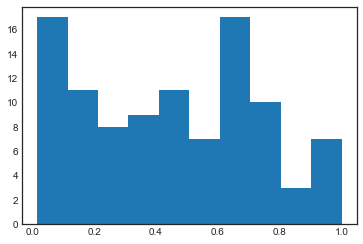

In [2]:
data = np.random.rand(100)
plt.hist(data)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


(array([1.82962829, 2.13456634, 1.21975219, 1.21975219, 0.6098761 ,
        1.52469024, 0.6098761 , 0.91481414, 0.91481414, 0.        ,
        1.82962829, 0.91481414, 1.21975219, 1.21975219, 0.91481414,
        0.        , 1.82962829, 0.30493805, 2.74444243, 1.82962829,
        0.6098761 , 0.91481414, 0.91481414, 1.21975219, 0.30493805,
        0.        , 0.6098761 , 0.6098761 , 0.        , 1.52469024]),
 array([0.0160122 , 0.04880575, 0.0815993 , 0.11439284, 0.14718639,
        0.17997994, 0.21277348, 0.24556703, 0.27836058, 0.31115412,
        0.34394767, 0.37674121, 0.40953476, 0.44232831, 0.47512185,
        0.5079154 , 0.54070895, 0.57350249, 0.60629604, 0.63908958,
        0.67188313, 0.70467668, 0.73747022, 0.77026377, 0.80305732,
        0.83585086, 0.86864441, 0.90143795, 0.9342315 , 0.96702505,
        0.99981859]),
 <a list of 1 Patch objects>)

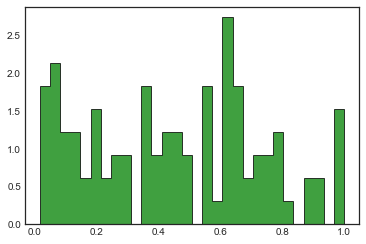

In [12]:
plt.hist(data, bins=30, normed=True, alpha=0.75, histtype='stepfilled', color='green', edgecolor='black')

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


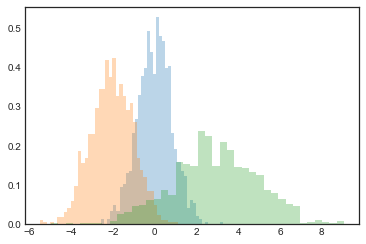

In [14]:
x1 = np.random.normal(0, 0.8, 1000)       
x2 = np.random.normal(-2, 1, 1000)       
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs)       
plt.hist(x2, **kwargs)       
plt.hist(x3, **kwargs);

That was plotting multiple histograms in one plot

To compute the histogram, np.histogram() function is available

In [15]:
counts, bin_edges = np.histogram(data, bins=5)       
print(counts)

[28 17 18 27 10]


Just as we create histograms in one dimension by dividing the number line into bins, we can also create histograms in two dimensions by dividing points among twodimensional bins. 

In [16]:
mean = [0, 0]       
cov = [[1, 1], [1, 2]]       
x, y = np.random.multivariate_normal(mean, cov, 10000).T

One way to plot 2D histograms is to use plt.hist2D() function

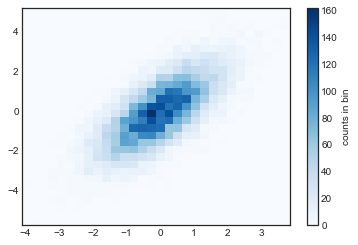

In [17]:
plt.hist2d(x, y, bins=30, cmap='Blues')        
cb = plt.colorbar()        
cb.set_label('counts in bin')

Bins are the number of intervals you want to divide all of your data into, such that it can be displayed as bars on a histogram. A simple method to work our how many bins are suitable is to take the square root of the total number of values in your distribution. 

Just as plt.hist has a counterpart in np.histogram, plt.hist2d has a counterpart in np.histogram2d

In [18]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30) 

The two-dimensional histogram creates a tessellation of squares across the axes. Another natural shape for such a tessellation is the regular hexagon. For this purpose, Matplotlib provides the plt.hexbin routine, which represents a two-dimensional dataset binned within a grid of hexagons 

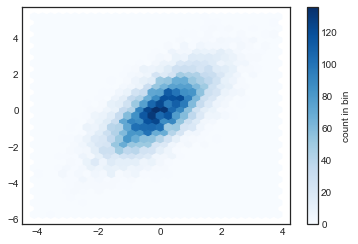

In [25]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')       
cb = plt.colorbar(label='count in bin')

plt.hexbin has a number of interesting options, including the ability to specify weights for each point, and to change the output in each bin to any NumPy aggregate (mean of weights, standard deviation of weights, etc.).


KDE (Kernal Density Estimation) can be thought of as a way to “smear out” the points in space and add up the result to obtain a smooth function. One extremely quick and simple KDE implementation exists in the scipy.stats package.

In [26]:
from scipy.stats import gaussian_kde
# fit an array of size [Ndim, Nsamples]        
data = np.vstack([x, y])        
kde = gaussian_kde(data)
# evaluate on a regular grid        
xgrid = np.linspace(-3.5, 3.5, 40)        
ygrid = np.linspace(-6, 6, 40)        
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)        
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

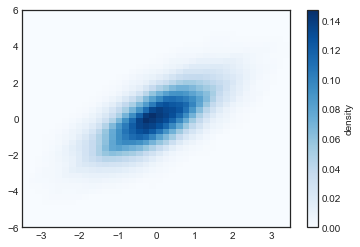

In [27]:
# Plot the result as an image        
plt.imshow(Z.reshape(Xgrid.shape),                   
origin='lower', aspect='auto',                   
extent=[-3.5, 3.5, -6, 6], cmap='Blues')        
cb = plt.colorbar()        
cb.set_label("density")

KDE has a smoothing length that effectively slides the knob between detail and smoothness (one example of the ubiquitous bias–variance trade-off)